In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
file = "data.csv"
df = pd.read_csv(file)

In [ ]:
print(df)

     Nest_Number  Elevation  AvgTemp   Latitude  Longitude  Strike  Washovers  \
0              1      2.005     28.13  31.78893  -81.05676    28.0          0   
1              2      2.676     29.38  31.80665  -81.04015     1.0          0   
2              3      2.088     29.21  31.82410  -81.04753    28.0          0   
3              4      1.853     29.33  31.77467  -81.06917    22.0          0   
4              5      2.806     29.67  31.78591  -81.05904    76.0          0   
..           ...        ...       ...       ...        ...     ...        ...   
165          193        NaN     31.14  31.81445  -81.03735    24.0          0   
166          195        NaN     30.71  31.79482  -81.05193    53.0          0   
167          196        NaN     30.39  31.82235  -81.04929   228.0          1   
168          199        NaN     30.08  31.72737  -81.12714   220.0          6   
169          200        NaN     30.53  31.75788  -81.08699    50.0          3   

     Suitability  
0       

In [4]:
Y = df['Suitability']
X = df.drop(['Suitability'], axis=1)

print(X.shape)
print(Y.shape)

X = np.array(X)

(5000, 5)
(5000,)


In [5]:
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Suitability, dtype: int64

In [6]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy',
                                   mode='max',
                                   patience=10,
                                   restore_best_weights=True)


history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=5,
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
400/400 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.5727 - val_loss: nan - val_accuracy: 0.5500
Epoch 2/5
400/400 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5727 - val_loss: nan - val_accuracy: 0.5500
Epoch 3/5
400/400 [==============================] -

In [8]:
input_features = np.array([[1,2.005,28.13,31.78893,-81.05676,28.0,0]])

# Step 3: Make Predictions
predicted_value = model.predict(input_features)

print(f"Predicted Value: {predicted_value[0]}")

ValueError: ignored

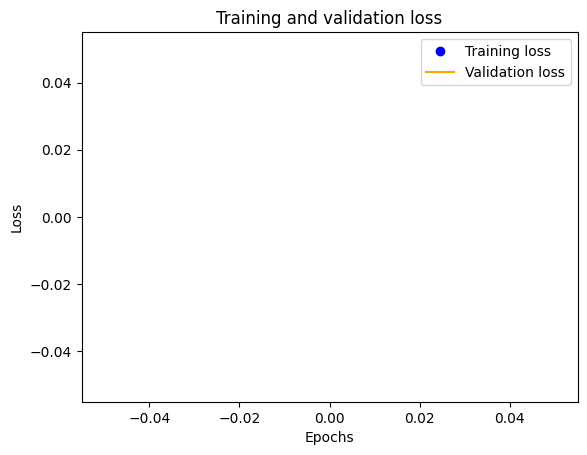

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()